In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

### データの読み込みと内容確認

In [2]:
sales = pd.read_csv('data_file/sales_train.csv.gz')
shops = pd.read_csv('data_file/shops.csv')
items = pd.read_csv('data_file/items.csv')
item_cats = pd.read_csv('data_file/item_categories.csv')
test_df  = pd.read_csv('data_file/test.csv')

In [12]:
print(sales.shape)
sales.head(10)

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [13]:
print(shops.shape)
shops.head(10)

(60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [14]:
print(items.shape)
items.head(10)

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [15]:
print(item_cats.shape)
item_cats.head(10)

(84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [16]:
print(test_df.shape)
test_df.head()

(214200, 3)


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


date               商品が購入された日付<p>
date_block_num     月ラベル。2013年1月を0としている。<p>
                   最大が33なので、2013年1月から2015年10月までの約3年分のデータがある。<p>
shop_id            店舗id。全60種。<p>
item_id            商品id<p>
item_price         商品の値段。単位はルーブル？<p>
item_cnt_day       商品が売れた個数。マイナスは返品。<p>
item_name          商品名。全22170種。<p>
item_category_id   商品カテゴリーid。全84種。<p>
item_category_name 商品カテゴリー名

### 総合的な売り上げの変遷

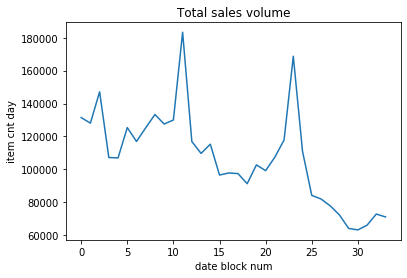

In [94]:
grp = sales_df.groupby("date_block_num", as_index = False).sum()
plt.plot(grp.date_block_num, grp.item_cnt_day)
plt.xlabel("date block num")
plt.ylabel("item cnt day")
plt.title("Total sales volume")
plt.show()

全体的にやや右肩下がり。はっきりとした原因は今のところよくわからない。<p>
年末年始の売り上げ（クリスマスや正月？）が比較的多い。つまり時期による売り上げの変動があるので、トレーニングデータはある程度この周期性を考慮に入れるべきかもしれない。今回予測するのは11月だから、date_block_numが22のデータをトレーニングに使用するとか。

### item_cnt_dayに関するまとめ

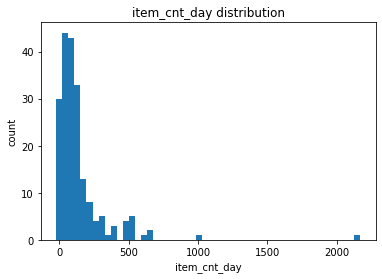

In [24]:
item_cnt_uni = sales.item_cnt_day.unique()
plt.hist(item_cnt_uni,bins=50)
plt.xlabel("item_cnt_day")
plt.ylabel("count")
plt.title("item_cnt_day distribution")
plt.show()

1日当たりで1000以上売れている商品がある。

In [26]:
item_cnt_over = sales_df[sales_df.item_cnt_day>800]
item_cnt_over

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
2326930,15.01.2015,24,12,20949,4.000000,1000.0,71
2909818,28.10.2015,33,12,11373,0.908714,2169.0,9


In [30]:
print(items[items.item_id == 11373].item_name.iloc[0])
print(items[items.item_id == 20949].item_name.iloc[0])

Доставка до пункта выдачи (Boxberry)
Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм


11373 → ピックアップポイントへの配送（Boxberry）<p>
20949 → 会社パッケージシャツ1Cインタレストホワイト（34 * 42）45ミクロン …… ビニール袋みたいなやつ。

In [32]:
sales[sales.item_id == 11373].item_cnt_day.describe()

count     464.000000
mean       14.144397
std       104.604937
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max      2169.000000
Name: item_cnt_day, dtype: float64

In [33]:
sales[sales.item_id == 20949].item_cnt_day.describe()

count    31340.000000
mean         5.987301
std         11.497655
min        -16.000000
25%          2.000000
50%          3.000000
75%          7.000000
max       1000.000000
Name: item_cnt_day, dtype: float64

平均から大きく外れているので外れ値としてどっちも削除してもいいか？ビニール袋なら1日1000枚はありえるか？

item_cnt_dayが0以下→0、20以上→20にクリップするような指定。何パーセントのデータがこのクリップの影響を受けるか？

In [43]:
over20 = sales[sales.item_cnt_day>20].count().item_cnt_day
under0 = sales[sales.item_cnt_day<0].count().item_cnt_day

a = (100*over20+under0)/(sales.count().item_cnt_day)
print(a)

0.11879221308725346


影響を受けるのは全体で約0.1%

### item_categoryごとでの売り上げ変動

トータルの売り上げ変遷と比べてどうか。カテゴリで何か変わった動きがないか。商品の発売日やクリスマス等のイベントによって売り上げが大きくなるものや、逆にコンスタントに売れ続けているものはないか。

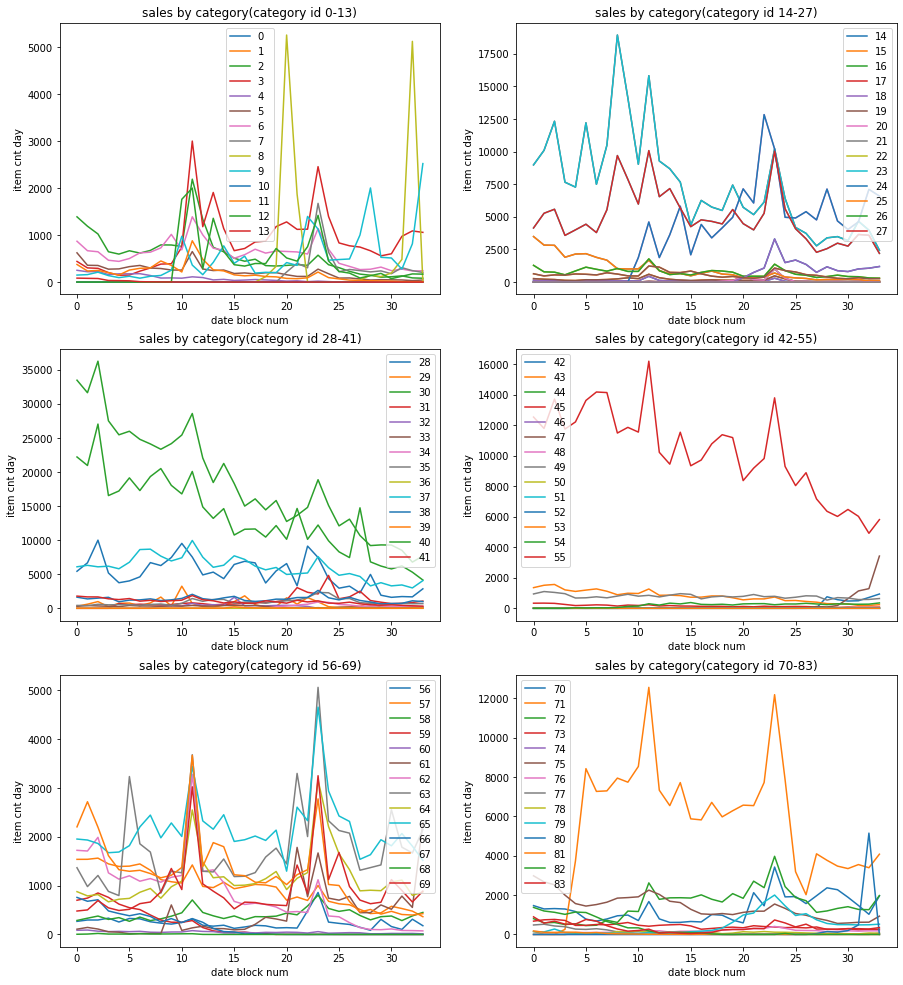

In [8]:
sales_df = sales.merge(items.drop("item_name",axis = 1),how="left",on="item_id")
grp_category = sales_df.pivot_table(index=["date_block_num"],columns=["item_category_id"], values="item_cnt_day",aggfunc=np.sum,fill_value=0)
grp_13 = grp_category.iloc[:,0:14]
grp_27 = grp_category.iloc[:,14:28]
grp_41 = grp_category.iloc[:,28:42]
grp_55 = grp_category.iloc[:,42:56]
grp_69 = grp_category.iloc[:,56:70]
grp_83 = grp_category.iloc[:,70:84]

fig = plt.figure(figsize=(15,35))

ax1 = fig.add_subplot(6, 2, 1)
for x in range(14):
    ax1.plot(grp_13.index,grp_13.iloc[:,x],label=x)
ax1.set_xlabel("date block num")
ax1.set_ylabel("item cnt day")
ax1.set_title("sales by category(category id 0-13)")
ax1.legend(loc='best')

ax2 = fig.add_subplot(6, 2, 2)
for x in range(14):
    y2 = x + 14
    ax2.plot(grp_27.index,grp_27.iloc[:,x],label=y2)
ax2.plot(grp_27)
ax2.set_xlabel("date block num")
ax2.set_ylabel("item cnt day")
ax2.set_title("sales by category(category id 14-27)")
ax2.legend(loc='best')

ax3 = fig.add_subplot(6, 2, 3)
for x in range(14):
    y3 = x + 28
    ax3.plot(grp_41.index,grp_41.iloc[:,x],label=y3)
ax3.set_xlabel("date block num")
ax3.set_ylabel("item cnt day")
ax3.set_title("sales by category(category id 28-41)")
ax3.legend(loc='best')

ax4 = fig.add_subplot(6, 2, 4)
for x in range(14):
    y4 = x + 42
    ax4.plot(grp_55.index,grp_55.iloc[:,x],label=y4)
ax4.set_xlabel("date block num")
ax4.set_ylabel("item cnt day")
ax4.set_title("sales by category(category id 42-55)")
ax4.legend(loc='best')

ax5 = fig.add_subplot(6, 2, 5)
for x in range(14):
    y5 = x + 56
    ax5.plot(grp_69.index,grp_69.iloc[:,x],label=y5)
ax5.set_xlabel("date block num")
ax5.set_ylabel("item cnt day")
ax5.set_title("sales by category(category id 56-69)")
ax5.legend(loc='best')

ax6 = fig.add_subplot(6, 2, 6)
for x in range(14):
    y6 = x + 70
    ax6.plot(grp_83.index,grp_83.iloc[:,x],label=y6)
ax6.set_xlabel("date block num")
ax6.set_ylabel("item cnt day")
ax6.set_title("sales by category(category id 70-83)")
ax6.legend(loc='best')

plt.show()

値のないところは0で埋めた。見やすいわけではないが多少の傾向はわかる。値がほとんどない、例えばcategory_id 68とかは考慮に入れなくていいのか。年末に売れそうな商品のカテゴリーもこれでおおよそわかる。
8は変なところでピーク。

In [11]:
item_cats[item_cats.item_category_id ==8]

,item_category_name,item_category_id
8,Билеты (Цифра),8


翻訳すると「チケット」。期間限定で販売されている商品なのかもしれない。カテゴリで売り上げに違いがあるのならこの情報も学習に取り入れたほうがいいのか。

どのカテゴリーが売れているか？

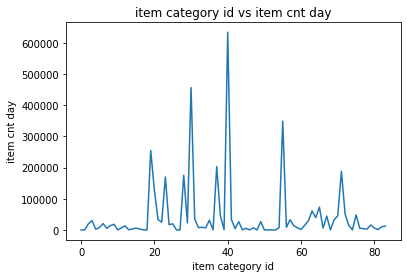

In [87]:
grp = sales_df.groupby("item_category_id", as_index = False).sum()
plt.plot(grp["item_category_id"],grp["item_cnt_day"])
plt.xlabel("item category id")
plt.ylabel("item cnt day")
plt.title("item category id vs item cnt day")
plt.show()

In [93]:
grp_ = grp.merge(item_cats, how="left", on="item_category_id")
grp_ .sort_values("item_cnt_day", ascending=False).item_category_name.head(10)

40                                  Кино - DVD
30               Игры PC - Стандартные издания
55         Музыка - CD локального производства
19                                  Игры - PS3
37                              Кино - Blu-Ray
71    Подарки - Сумки, Альбомы, Коврики д/мыши
28            Игры PC - Дополнительные издания
23                             Игры - XBOX 360
20                                  Игры - PS4
65      Подарки - Настольные игры (компактные)
Name: item_category_name, dtype: object

売れてるカテゴリidの上位10<p>
シネマ-DVD<p>
PCゲーム-スタンダードエディション<p>
音楽-ローカルプロダクションCD<p>
ゲーム-PS3<p>
シネマ-ブルーレイ<p>
ギフト-バッグ、アルバム、マウスパッド<p>
PCゲーム-追加エディション<p>
ゲーム-XBOX 360<p>
ゲーム-PS4<p>
ギフト-ボードゲーム（コンパクト）<p>
これをどう使うかは未定。ただカテゴリごとに売れ行きの傾向があるのなら（カテゴリーごとの総合的な売り上げにここまで顕著な差があるのなら）この情報も学習に組み込んだらなにか変化があるのかもしれない。要検討。

### 個々のitemの売り上げに関して

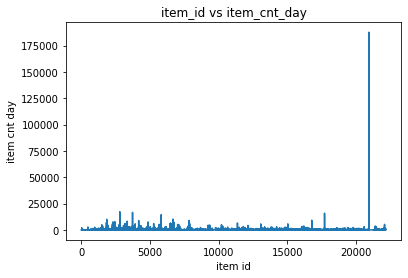

In [3]:
grp_item = sales.groupby("item_id", as_index = False).sum()
plt.plot(grp_item.item_id, grp_item.item_cnt_day)
plt.xlabel("item id")
plt.ylabel("item cnt day")
plt.title("item_id vs item_cnt_day")
plt.show()

In [18]:
grp_item[grp_item.item_cnt_day==grp_item.item_cnt_day.max()].item_id.iloc[0]

20949

In [19]:
items[items.item_id==20949]

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


先ほどもでてきたitem_id 20949がぶっちぎり。おそらく商品とかをつめる袋で、日常的に売られているものと考えられる。1日あたり平均で6枚程度売れていると言われると少ない気もする。

### 値段の分布

商品の値段の分布を確かめる。値段の分布が売り上げと何らかの相関があれば学習に使えるかもしれないという発想から。

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64


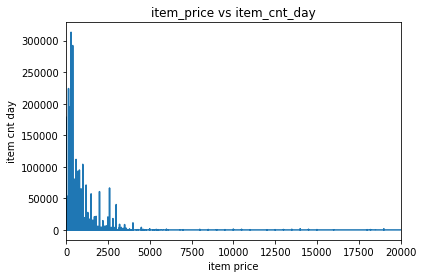

In [75]:
price = sales_df.item_price
print(price.describe())

grp_pr = sales_df.groupby("item_price", as_index = False).sum()
plt.plot(grp_pr["item_price"],grp_pr["item_cnt_day"])
plt.xlabel("item price")
plt.ylabel("item cnt day")
plt.title("item_price vs item_cnt_day")
plt.xlim([-5,20000])

plt.show()

個別のitemで散布図を作るとわかりづらいので、一定のbinでまとめればある程度使える情報になるかもしれない（要検討）。この情報が使えるかはともかく、大きく外れているものがあったので、とりあえず最大と最小を調べる（場合によっては異常値か）

In [24]:
sales_df = sales.merge(items.drop("item_name",axis = 1),how="left",on="item_id")
max_price = sales_df["item_price"].max() 
min_price = sales_df["item_price"].min()
print("max_price … "+str(max_price))
print("min_price … "+str(min_price))

max_id = sales_df[sales_df.item_price == max_price].item_id
max_item_name = items[items["item_id"] == max_id.iloc[0]].item_name
max_item_category_id = items[items["item_id"] == max_id.iloc[0]].item_category_id
max_item_category_name = item_cats[item_cats["item_category_id"] == max_item_category_id.iloc[0]].item_category_name

min_id = sales_df[sales_df.item_price == min_price].item_id
min_item_name = items[items["item_id"] == min_id.iloc[0]].item_name
min_item_category_id = items[items["item_id"] == min_id.iloc[0]].item_category_id
min_item_category_name = item_cats[item_cats["item_category_id"] == min_item_category_id.iloc[0]].item_category_name

print("max_item_name … "+str(max_item_name.iloc[0]))
print("max_item_category_name … "+str(max_item_category_name.iloc[0]))
print("min_item_name … "+str(min_item_name.iloc[0]))
print("min_item_category_name … "+str(min_item_category_name.iloc[0]))

max_price … 307980.0
min_price … -1.0
max_item_name … Radmin 3  - 522 лиц.
max_item_category_name … Программы - Для дома и офиса
min_item_name … DmC Devil May Cry [PS3, русские субтитры]
min_item_category_name … Игры - PS3


翻訳結果

In [25]:
pd.DataFrame([["Radmin 3","プログラム-家庭およびオフィス向け", max_price],["DmCデビルメイクライ[PS3、ロシア語字幕]",\
            "ゲーム-PS3",min_price]],index=["max_price","min_price"],columns=["商品名","カテゴリ","値段"])

,商品名,カテゴリ,値段
max_price,Radmin 3,プログラム-家庭およびオフィス向け,307980.0
min_price,DmCデビルメイクライ[PS3、ロシア語字幕],ゲーム-PS3,-1.0


単位はルーブルでいいのか。最高額は307980ルーブル。1ルーブルが約1.7円だから、約523566円ネットで調べたらソフトウェアのたぐいらしい。ソフトに50万ってありえるのか？<p>
逆に最小値段は-1.0ルーブル。値段はマイナスにならないはずなので異常値か。とりあえず他のDmCデビルメイクライ[PS3、ロシア語字幕]の値段を調べる。

In [32]:
min_item = sales[sales["item_id"] == min_id.iloc[0]].item_price
min_item.describe()

count     780.000000
mean     2041.627277
std       584.281629
min        -1.000000
25%      1249.500000
50%      2499.000000
75%      2499.000000
max      2499.000000
Name: item_price, dtype: float64

これを見るとだいたい2000程度の値段で、標準偏差が584だから1000を下回ることは異常ととらえてよさそう。<p>
また個々の商品で値段の変動があるケースがあることも念頭に置いておいたほうがいいかもしれない。

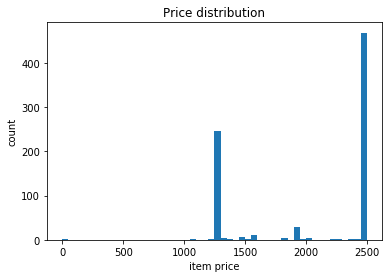

In [38]:
plt.hist(min_item,bins=50)
plt.xlabel("item price")
plt.ylabel("count")
plt.title("Price distribution")
plt.show()

同様にRadmin 3についても調べる

In [39]:
max_item = sales[sales["item_id"] == max_id.iloc[0]].item_price
max_item.describe()

count         1.0
mean     307980.0
std           NaN
min      307980.0
25%      307980.0
50%      307980.0
75%      307980.0
max      307980.0
Name: item_price, dtype: float64

この3年で1回しか購入履歴がない。単に高価というだけで異常ではなさそう。ただし、3年で1回しかデータに現れない上に値が大きいので、学習に影響を及ぼすようなら消してもいいかもしれない。

### 店舗ごとの売り上げ個数の変遷

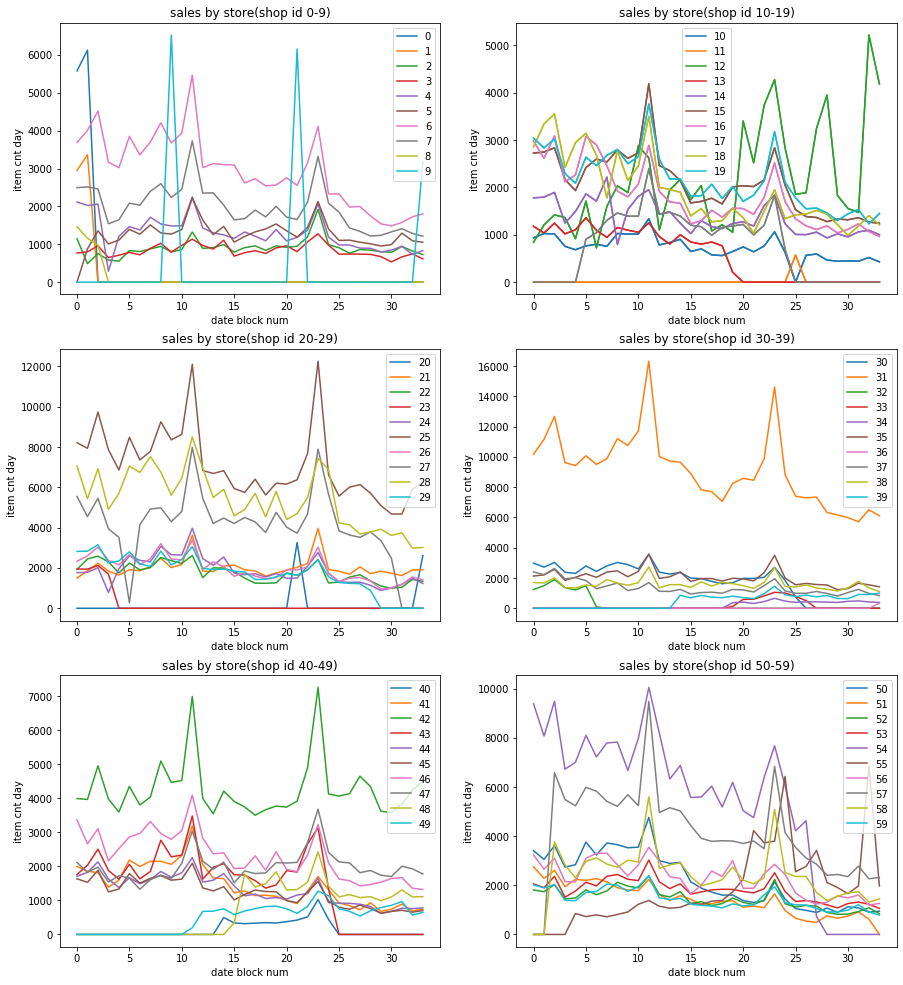

In [56]:
grp_shop = sales_df.pivot_table(index=["date_block_num"],columns=["shop_id"],\
                                values="item_cnt_day",aggfunc=np.sum,fill_value=0)
grp_10 = grp_shop.iloc[:,0:10]
grp_20 = grp_shop.iloc[:,10:20]
grp_30 = grp_shop.iloc[:,20:30]
grp_40 = grp_shop.iloc[:,30:40]
grp_50 = grp_shop.iloc[:,40:50]
grp_60 = grp_shop.iloc[:,50:60]

fig = plt.figure(figsize=(15,35))

ax1 = fig.add_subplot(6, 2, 1)
for x in range(10):
    ax1.plot(grp_10.index,grp_10.iloc[:,x],label=x)
ax1.set_xlabel("date block num")
ax1.set_ylabel("item cnt day")
ax1.set_title("sales by store(shop id 0-9)")
ax1.legend(loc='best')

ax2 = fig.add_subplot(6, 2, 2)
for x in range(10):
    y2 = x + 10
    ax2.plot(grp_20.index,grp_20.iloc[:,x],label=y2)
ax2.plot(grp_20)
ax2.set_xlabel("date block num")
ax2.set_ylabel("item cnt day")
ax2.set_title("sales by store(shop id 10-19)")
ax2.legend(loc='best')

ax3 = fig.add_subplot(6, 2, 3)
for x in range(10):
    y3 = x + 20
    ax3.plot(grp_30.index,grp_30.iloc[:,x],label=y3)
ax3.set_xlabel("date block num")
ax3.set_ylabel("item cnt day")
ax3.set_title("sales by store(shop id 20-29)")
ax3.legend(loc='best')

ax4 = fig.add_subplot(6, 2, 4)
for x in range(10):
    y4 = x + 30
    ax4.plot(grp_40.index,grp_40.iloc[:,x],label=y4)
ax4.set_xlabel("date block num")
ax4.set_ylabel("item cnt day")
ax4.set_title("sales by store(shop id 30-39)")
ax4.legend(loc='best')

ax5 = fig.add_subplot(6, 2, 5)
for x in range(10):
    y5 = x + 40
    ax5.plot(grp_50.index,grp_50.iloc[:,x],label=y5)
ax5.set_xlabel("date block num")
ax5.set_ylabel("item cnt day")
ax5.set_title("sales by store(shop id 40-49)")
ax5.legend(loc='best')

ax6 = fig.add_subplot(6, 2, 6)
for x in range(10):
    y6 = x + 50
    ax6.plot(grp_60.index,grp_60.iloc[:,x],label=y6)
ax6.set_xlabel("date block num")
ax6.set_ylabel("item cnt day")
ax6.set_title("sales by store(shop id 50-59)")
ax6.legend(loc='best')

plt.show()

店舗ごとに売り上げの変化が異なる。0が連続しているところはどう見ればいいのか。新しく開業、あるいは閉店したのか。それとも単にデータがないだけか。売り上げが途中で0になっている店舗や、途中まで売り上げが0だった店舗があるが、これはどう解釈すればよいか。<p>
また、だいたいどこも年末の売り上げが立つのに、なぜか10月の売り上げだけが伸びている店がある(shop_id = 9, 20)。<p>

ここでshop.cvsより店舗名を見てみると、

0！ヤクーツクオルジョニキーゼ、56フラン<p>
1！ヤクーツクショッピングセンター「セントラル」フラン<p>
2 Adygea TC "Mega"<p>
3バラシハショッピングセンター「10月-キノミール」<p>
4ヴォルガショッピングセンター「ヴォルガモール」<p>
5Vologdaショッピングセンター「マーマレード」<p>
6ヴォロネジ（プレハノフスカヤ、13）<p>
7ヴォロネジSEC "Maximir"<p>
8ヴォロネジ市公園ショッピングセンター「Grad」<p>
9アウトバウンド取引<p>
10ジュコフスキー通りChkalova 39m？<p>
11ジュコフスキー通りチカロバ39m²<p>
12オンラインストアの緊急事態<p>
13カザンショッピングセンター「ベチェトル」<p>
14カザンショッピングセンター「パークハウス」II<p>
15カルーガショッピングセンター「XXIセンチュリー」<p>
16コロムナショッピングセンター「リオ」<p>
17クラスノヤルスクショッピングセンター「ライズオブザプラザ」<p>
18クラスノヤルスクショッピングセンター「6月」<p>
19クルスクショッピングセンター「プーシキンスキー」<p>
20モスクワ「セール」<p>
21モスクワアフリモールモール<p>
22モスクワ店C21<p>
23Moscow TC "Budenovsky"（Pav.​​A2）<p>
24モスクワショッピングモール「ブデノフスキー」（Pav.​​K7）<p>
25モスクワアトリウムショッピングアンドエンターテイメントセンター<p>
26モスクワショッピングセンター「Areal」（Belyaevo）<p>
27モスクワショッピングセンター「MEGA Belaya Dacha II」<p>
28モスクワショッピングセンター「MEGA Teply Stan」II<p>
29モスクワショッピングセンター「ニューセンチュリー」（ノボコシノ）<p>
30モスクワショッピングセンター「Perlovsky」<p>
31モスクワショッピングセンター「セメノフスキー」<p>
32モスクワショッピングセンター「シルバーハウス」<p>
33ミティシチTRK「XL-3」<p>
34N.Novgorod SEC "RIO"<p>
35N。ノヴゴロドショッピングセンター「ファンタジー」<p>
36ノボシビルスクショッピングセンター「ギャラリーノボシビルスク」<p>
37ノボシビルスクショッピングセンター「メガ」<p>
38オムスクショッピングセンター「メガ」<p>
39ロストフナドンショッピングセンター「メガセンターホライズン」<p>
40ロストフショッピングセンター「メガセンターホライズン」島に戻る<p>
41ロストフナドンショッピングセンター「メガ」<p>
42SPb TC「ネフスキーセンター」<p>
43SPb TC「センナヤ」<p>
44サマラショッピングセンター「メロディ」<p>
45サマラショッピングセンターパークハウス<p>
46セルギエフポサドショッピングセンター「7Ya」<p>
47スルグートショッピングセンター「シティモール」<p>
48トムスクSEC「エメラルドシティ」<p>
49チュメニショッピングセンター「クリスタル」<p>
50チュメニショッピングセンター「グッドウィン」<p>
51チュメニショッピングセンター「グリーンビーチ」<p>
52Ufa TC「セントラル」<p>
53ウファショッピングセンター「ファミリー」2<p>
54ヒムキショッピングセンター「メガ」<p>
55デジタルウェアハウス1C-オンライン<p>
56チェーホフショッピングセンター「カーニバル」<p>
57ヤクーツクオルジョニキーゼ、56<p>
58ヤクーツクショッピングセンター「セントラル」<p>
59ヤロスラブリショッピングセンター「アルテア」<p>

いくつか店舗名がかぶってる。時間的な売り上げの変遷のグラフを見ても矛盾ない。前処理の段階でかぶっている店舗は統合する予定（0と57、1と58、10と11）。

### テストデータの確認

In [58]:
test_df.shape

(214200, 3)

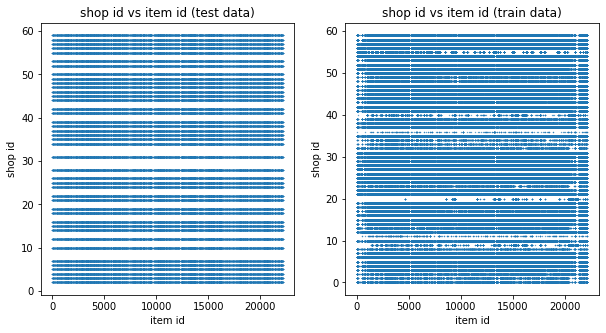

In [60]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 2, 1)

ax1.scatter(test_df["item_id"],test_df["shop_id"], s = 0.1)
ax1.set_xlabel("item id")
ax1.set_ylabel("shop id")
ax1.set_title("shop id vs item id (test data)")


ax2 = fig.add_subplot(1, 2, 2)

ax2.scatter(sales["item_id"],sales["shop_id"], s = 0.1)
ax2.set_xlabel("item id")
ax2.set_ylabel("shop id")
ax2.set_title("shop id vs item id (train data)")

plt.show()

In [65]:
# print(np.sort(sales["shop_id"].unique()))

print("number of test data shop_id … "+str(test_df["shop_id"].unique().shape[0]))
print("number of test data shop_id … "+str(sales["shop_id"].unique().shape[0]))
print("number of test data item_id … "+str(test_df["item_id"].unique().shape[0]))
print("number of train data item_id … "+str(sales["item_id"].unique().shape[0]))

number of test data shop_id … 42
number of test data shop_id … 60
number of test data item_id … 5100
number of train data item_id … 21807


トレーニングデータの方にはすべてのshop id →　データがないところは売れてないという解釈で問題ないか。
テストデータはみた感じランダムで予測するデータをしぼってる。テストデータのitem_id の総数は5100。shop_idの総数は42。

#### 検討課題<p>
・価格変動の振れ幅と考えられる原因（特に低価格帯）をどう考えるか → 異常値の解釈<p>
・すべて0で埋めるという方法で問題ないか。値段を特徴量に入れる場合は特に。店舗ごと、カテゴリごとの売り上げの変遷で、途中まで0であるところは平均で埋めれば精度は上がらないか<p>
・shop19 9などの極端なピークをどう解釈するべきか<p>
・値段と売り上げに相関はあるか、またそうだとしたらそれを特徴とできるか。その他特徴量も同様、何を基準に選択を行うべきか<p>